In [1]:
import os
import urllib2
import pandas as pd

import pylab as pl
from matplotlib import image
%matplotlib inline


In [2]:
def _fetch(outfile, RA, DEC, scale=0.2, width=400, height=400):
    """Fetch the image at the given RA, DEC from the SDSS server"""
    url = ("http://skyservice.pha.jhu.edu/DR12/ImgCutout/"
           "getjpeg.aspx?ra=%.8f&dec=%.8f&scale=%.2f&width=%i&height=%i&opt=OG" 
           % (RA, DEC, scale, width, height))
    print "downloading %s" % url
    print " -> %s" % outfile
    fhandle = urllib2.urlopen(url)
    open(outfile, 'w').write(fhandle.read())

def fetch_image(object_type):
    """Return the data array for the image of object type"""
    if not os.path.exists('downloads'):
        os.makedirs('downloads')

    filename = os.path.join('downloads', '%s_image.jpg' % object_type)
    if not os.path.exists(filename):
        RA = image_locations[object_type]['RA']
        DEC = image_locations[object_type]['DEC']
        _fetch(filename, RA, DEC)
        
    return image.imread(filename)

def fetch_image2(ra, dec, ind):
    """Return the data array for the image of object type"""
    if not os.path.exists('downloads'):
        os.makedirs('downloads')
    if dec > 0:
        filename = os.path.join('downloads', 'img%03i_%.8f+%.8f.jpg' % (ind, ra, dec))
    if dec < 0:
        filename = os.path.join('downloads', 'img%03i_%.8f%.8f.jpg' % (ind, ra, dec))
    print filename
    if not os.path.exists(filename):
        _fetch(filename, ra, dec)
    

In [105]:
cut = pd.read_csv('/Users/taweewat/Documents/xray_project/result/cut-01.csv',\
                    keep_default_na=False, na_values=[""])

In [106]:
for index, row in cut.iterrows():
    print row['RA'], row['DEC']
    ra=row['RA']
    dec=row['DEC']
    fetch_image2(ra, dec, index)

133.04933 76.4540577778
downloads/img000_133.04933000+76.45405778.jpg
downloading http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=133.04933000&dec=76.45405778&scale=0.20&width=400&height=400&opt=OG
 -> downloads/img000_133.04933000+76.45405778.jpg
34.3791233333 73.8256644445
downloads/img001_34.37912333+73.82566444.jpg
downloading http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=34.37912333&dec=73.82566444&scale=0.20&width=400&height=400&opt=OG
 -> downloads/img001_34.37912333+73.82566444.jpg
137.121913334 72.2754022222
downloads/img002_137.12191333+72.27540222.jpg
downloading http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=137.12191333&dec=72.27540222&scale=0.20&width=400&height=400&opt=OG
 -> downloads/img002_137.12191333+72.27540222.jpg
156.653913334 70.5444716666
downloads/img003_156.65391333+70.54447167.jpg
downloading http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=156.65391333&dec=70.54447167&scale=0.20&width=400&height=400&opt=

downloading http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=180.63040108&dec=64.96767375&scale=0.20&width=400&height=400&opt=OG
 -> downloads/star_image.jpg
downloading http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=197.51943983&dec=0.94881436&scale=0.20&width=400&height=400&opt=OG
 -> downloads/galaxy_image.jpg
downloading http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=226.18451462&dec=4.07456639&scale=0.20&width=400&height=400&opt=OG
 -> downloads/quasar_image.jpg


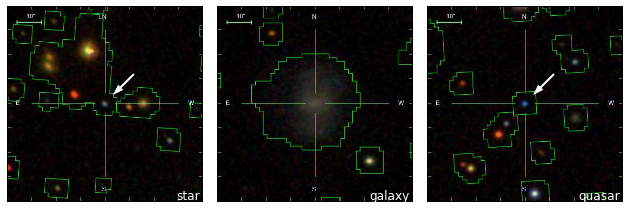

In [5]:
image_locations = dict(star=dict(RA=180.63040108,
                                 DEC=64.96767375),
                       galaxy=dict(RA=197.51943983,
                                   DEC=0.94881436),
                       quasar=dict(RA=226.18451462,
                                   DEC=4.07456639))






# Plot the images
fig = pl.figure(figsize=(9, 3))

# Check that PIL is installed for jpg support
if 'jpg' not in fig.canvas.get_supported_filetypes():
    raise ValueError("PIL required to load SDSS jpeg images")

object_types = ['star', 'galaxy', 'quasar']

for i, object_type in enumerate(object_types):
    ax = pl.subplot(131 + i, xticks=[], yticks=[])
    I = fetch_image(object_type)
    ax.imshow(I)
    if object_type != 'galaxy':
        pl.arrow(0.65, 0.65, -0.1, -0.1, width=0.005, head_width=0.03,
                 length_includes_head=True,
                 color='w', transform=ax.transAxes)
    pl.text(0.99, 0.01, object_type, fontsize='large', color='w', ha='right',
            transform=ax.transAxes)

pl.subplots_adjust(bottom=0.04, top=0.94, left=0.02, right=0.98, wspace=0.04)

In [99]:
print "%03i" % 83.00123123

083


In [97]:
cut.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
           dtype='int64', length=561)

In [2]:
import astropy